In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Shark_finish.csv', encoding='ISO-8859-1', low_memory=False)



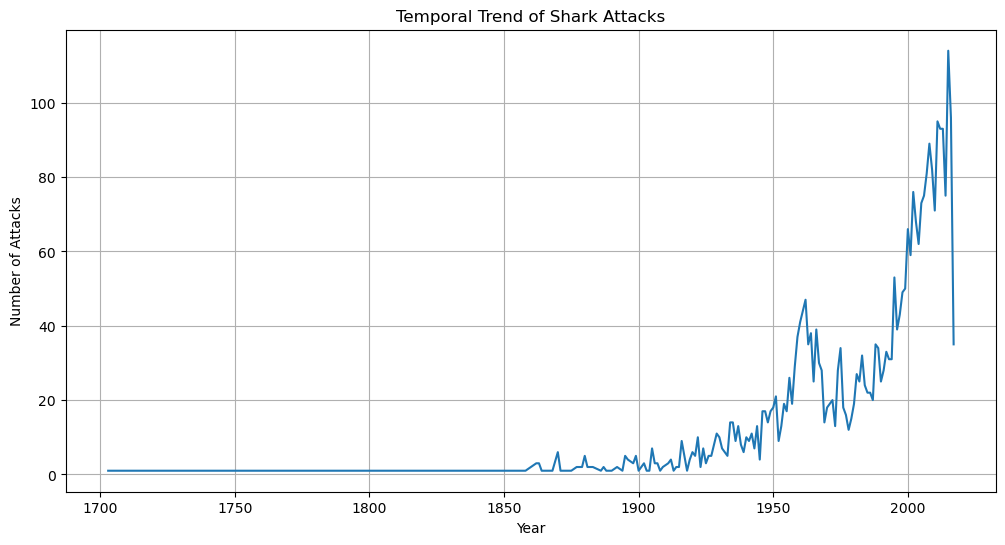

Top 10 Countries with Most Shark Attacks:
Country
USA                 1404
AUSTRALIA            666
SOUTH AFRICA         355
BAHAMAS               65
BRAZIL                56
NEW ZEALAND           45
PAPUA NEW GUINEA      41
MEXICO                38
REUNION               34
FIJI                  30
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Temporal Analysis
plt.figure(figsize=(12, 6))
yearly_attacks = df['Year'].value_counts().sort_index()
plt.plot(yearly_attacks.index, yearly_attacks.values)
plt.title('Temporal Trend of Shark Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

# Top 10 countries with most attacks
print("\
Top 10 Countries with Most Shark Attacks:")
print(df['Country'].value_counts().head(10))

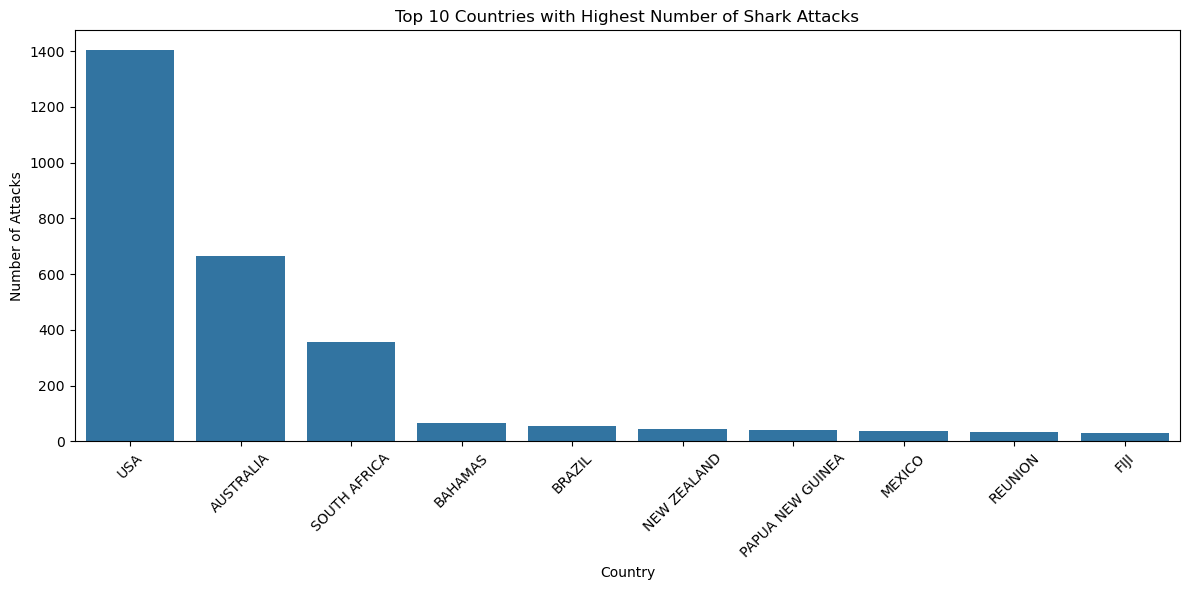

Type of Attacks in Top 3 Countries:
Type          Boat  Boating  Invalid  Provoked  Sea Disaster  Unprovoked
Country                                                                 
AUSTRALIA      4.0      4.0     49.0      66.0          13.0       530.0
SOUTH AFRICA   2.0      NaN     23.0      22.0           NaN       308.0
USA            4.0      1.0     84.0     102.0          10.0      1203.0
Most Common Activities During Attacks in Top 3 Countries:
USA:
   Country        Activity  Count
13     USA  Water Activity    678
12     USA         Unknown    600
10     USA         Fishing     72
AUSTRALIA:
     Country        Activity  Count
3  AUSTRALIA         Unknown    328
4  AUSTRALIA  Water Activity    251
1  AUSTRALIA         Fishing     74
SOUTH AFRICA:
        Country        Activity  Count
7  SOUTH AFRICA         Unknown    148
8  SOUTH AFRICA  Water Activity    144
5  SOUTH AFRICA         Fishing     52


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of top 10 countries
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with Highest Number of Shark Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional analysis: Type of attacks by top 3 countries
top_3_countries = df['Country'].value_counts().head(3).index
type_by_country = df[df['Country'].isin(top_3_countries)].groupby(['Country', 'Type']).size().unstack()
print("\
Type of Attacks in Top 3 Countries:")
print(type_by_country)

# Activity analysis for top countries
print("\
Most Common Activities During Attacks in Top 3 Countries:")
activities_top_countries = df[df['Country'].isin(top_3_countries)].groupby(['Country', 'Activity']).size().reset_index(name='Count')
for country in top_3_countries:
    print(f"\
{country}:")
    print(activities_top_countries[activities_top_countries['Country'] == country].sort_values('Count', ascending=False).head(3))

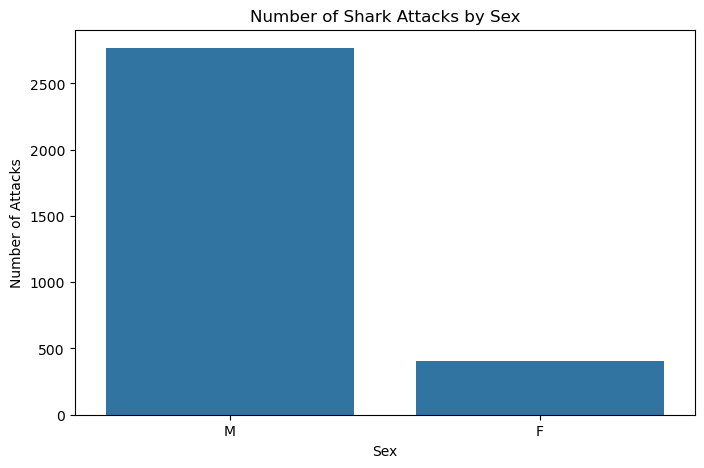

Number of Shark Attacks by Sex:
Sex
M    2767
F     409
Name: count, dtype: int64


In [5]:
# Analyze the number of attacks by sex
sex_counts = df['Sex'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Number of Shark Attacks by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Attacks')
plt.show()

# Display the counts
print("\
Number of Shark Attacks by Sex:")
print(sex_counts)

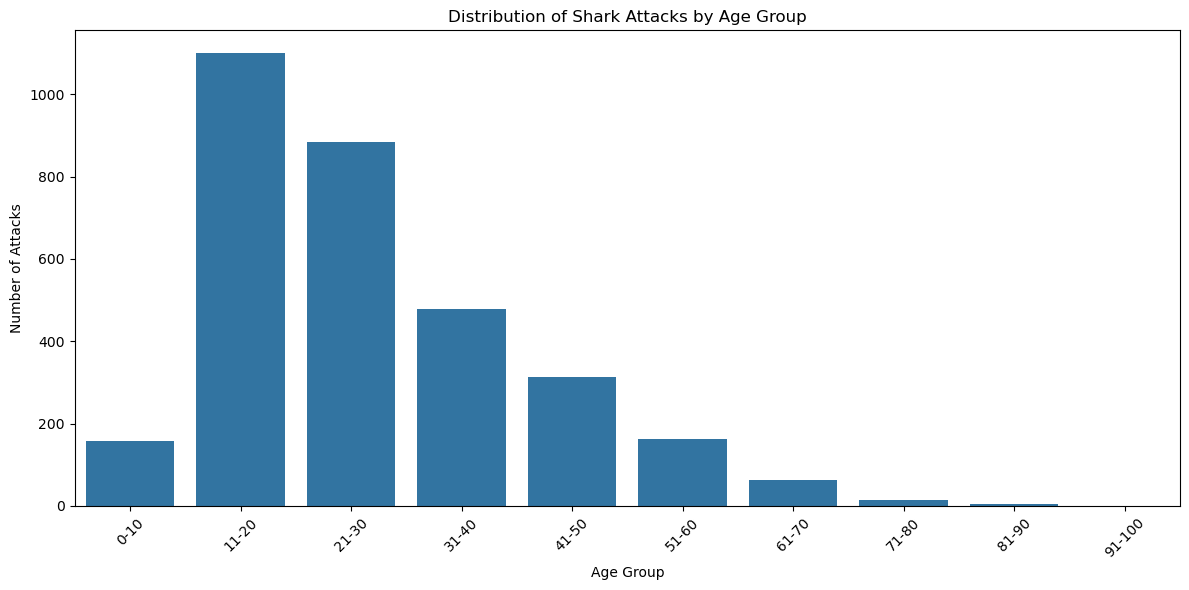

Age Statistics:
count    3176.000000
mean       27.365869
std        13.802417
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: Age, dtype: float64
Number of Attacks by Age Group:
Age_Group
0-10       157
11-20     1100
21-30      883
31-40      478
41-50      313
51-60      163
61-70       64
71-80       14
81-90        4
91-100       0
Name: count, dtype: int64


In [6]:
import numpy as np

# Convert Age to numeric, handling any non-numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count attacks by age group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Distribution of Shark Attacks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display basic statistics about age
print("\
Age Statistics:")
print(df['Age'].describe())

# Display counts by age group
print("\
Number of Attacks by Age Group:")
print(age_group_counts)

<Figure size 1500x800 with 0 Axes>

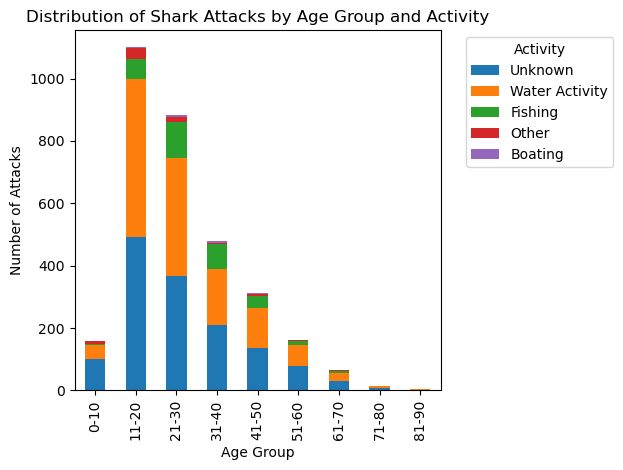

Top 5 Activities Overall:
Activity
Unknown           1423
Water Activity    1339
Fishing            324
Other               74
Boating             16
Name: count, dtype: int64
Breakdown of Activities by Age Group:
Activity   Unknown  Water Activity  Fishing  Other  Boating
Age_Group                                                  
0-10            99              48        2      8        0
11-20          492             508       64     35        1
21-30          368             376      118     15        6
31-40          211             178       80      5        4
41-50          135             130       38      7        3
51-60           77              68       13      3        2
61-70           30              26        7      1        0
71-80            9               4        1      0        0
81-90            2               1        1      0        0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create age groups if not already created
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Get the top 5 activities
top_activities = df['Activity'].value_counts().head(5).index

# Create a cross-tabulation of age groups and activities
activity_age_data = pd.crosstab(df['Age_Group'], df['Activity'])
activity_age_data = activity_age_data[top_activities]

# Create a stacked bar plot
plt.figure(figsize=(15, 8))
activity_age_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Shark Attacks by Age Group and Activity')
plt.xlabel('Age Group')
plt.ylabel('Number of Attacks')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the numerical data
print("\
Top 5 Activities Overall:")
print(df['Activity'].value_counts().head())

print("\
Breakdown of Activities by Age Group:")
print(activity_age_data)

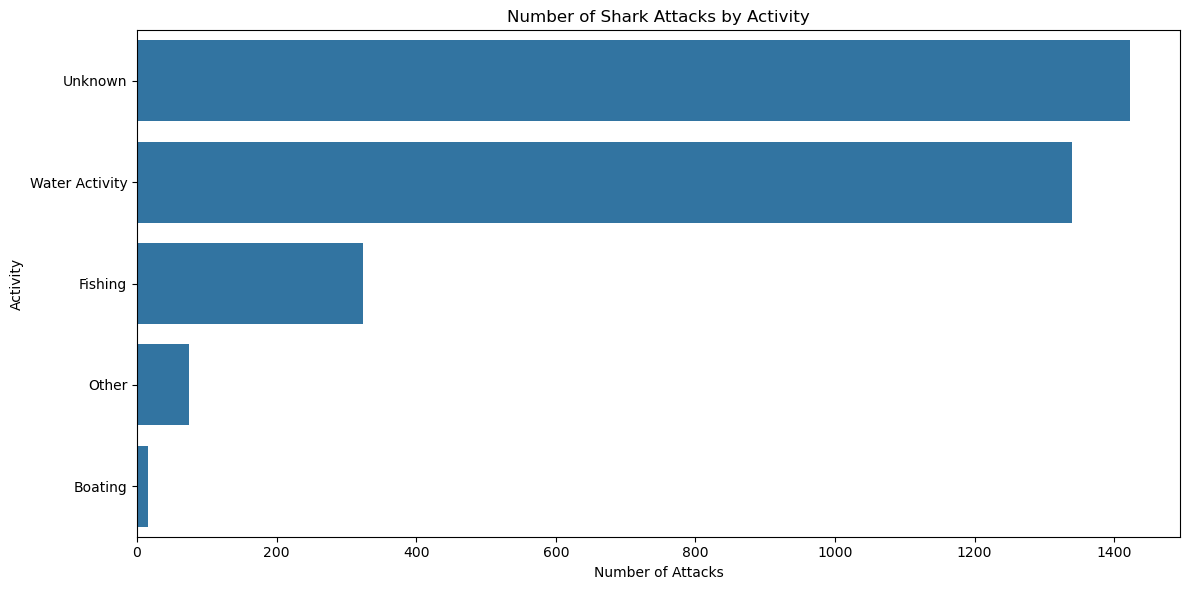

Number of Attacks by Activity:
Activity
Unknown           1423
Water Activity    1339
Fishing            324
Other               74
Boating             16
Name: count, dtype: int64
Percentage of Total Attacks by Activity:
Activity
Unknown           44.80
Water Activity    42.16
Fishing           10.20
Other              2.33
Boating            0.50
Name: count, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get activity counts
activity_counts = df['Activity'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_counts.values, y=activity_counts.index)
plt.title('Number of Shark Attacks by Activity')
plt.xlabel('Number of Attacks')
plt.ylabel('Activity')
plt.tight_layout()
plt.show()

# Display numerical data
print("\
Number of Attacks by Activity:")
print(activity_counts)

# Calculate percentages
activity_percentages = (activity_counts / len(df) * 100).round(2)
print("\
Percentage of Total Attacks by Activity:")
print(activity_percentages)

/tmp/ipykernel_47366/3137629869.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


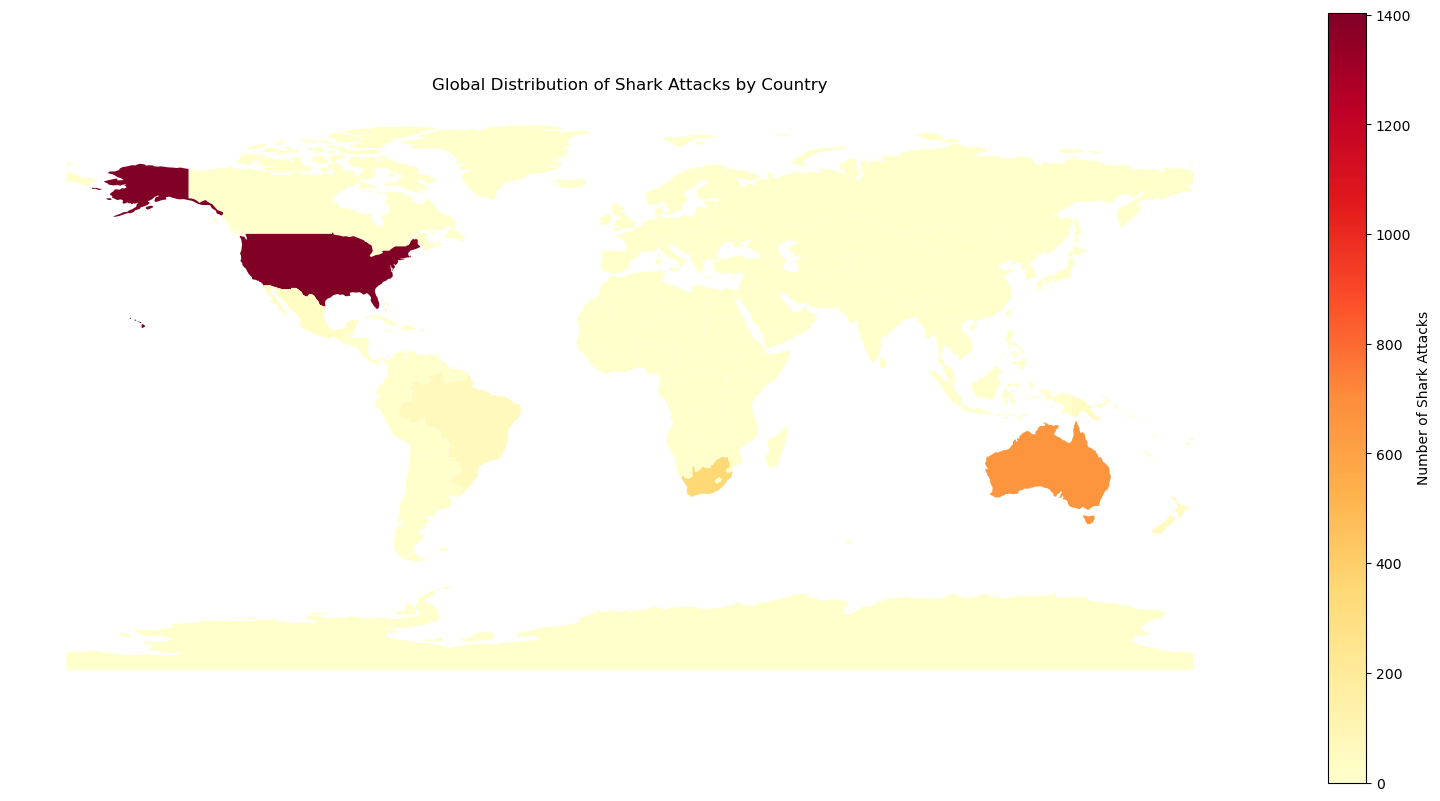

Top 10 Countries with Most Shark Attacks:
Country_Mapped
United States of America    1404
Australia                    666
South Africa                 355
Bahamas                       65
Brazil                        56
New Zealand                   45
Papua New Guinea              41
Mexico                        38
Réunion                       34
Fiji                          30
Name: count, dtype: int64


In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with shark attack data.
# Generate sample data if not available:
# df = pd.DataFrame({'Country': ['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'USA', 'USA', 'BRAZIL', 'MEXICO', 'FIJI']})

# Get shark attack counts per country
country_counts = df['Country'].value_counts()

# Load world map data directly from geopandas without external files
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a dictionary to map custom country names in 'df' to standardized names in the 'world' dataset
country_mapping = {
    'USA': 'United States of America',
    'AUSTRALIA': 'Australia',
    'SOUTH AFRICA': 'South Africa',
    'NEW ZEALAND': 'New Zealand',
    'BRAZIL': 'Brazil',
    'MEXICO': 'Mexico',
    'FIJI': 'Fiji',
    'BAHAMAS': 'Bahamas',
    'PAPUA NEW GUINEA': 'Papua New Guinea',
    'REUNION': 'Réunion'  # Adjusted for natural earth name standard
}

# Map the countries in 'df' to standardized names
df['Country_Mapped'] = df['Country'].map(lambda x: country_mapping.get(x.upper(), x.upper()))

# Create a series of attack counts using standardized country names
attack_counts = df['Country_Mapped'].value_counts()

# Add a new column to the 'world' GeoDataFrame with attack counts, using the country name as the key
world['attack_counts'] = world['name'].map(lambda x: attack_counts.get(x, 0))

# Plot the map with attack counts per country
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(
    column='attack_counts', 
    ax=ax, 
    legend=True, 
    legend_kwds={'label': "Number of Shark Attacks"},
    missing_kwds={'color': 'lightgrey'},  # for countries without data
    cmap='YlOrRd'
)

plt.title('Global Distribution of Shark Attacks by Country')
plt.axis('off')
plt.show()

# Display top 10 countries with the most attacks
print("Top 10 Countries with Most Shark Attacks:")
print(attack_counts.head(10))


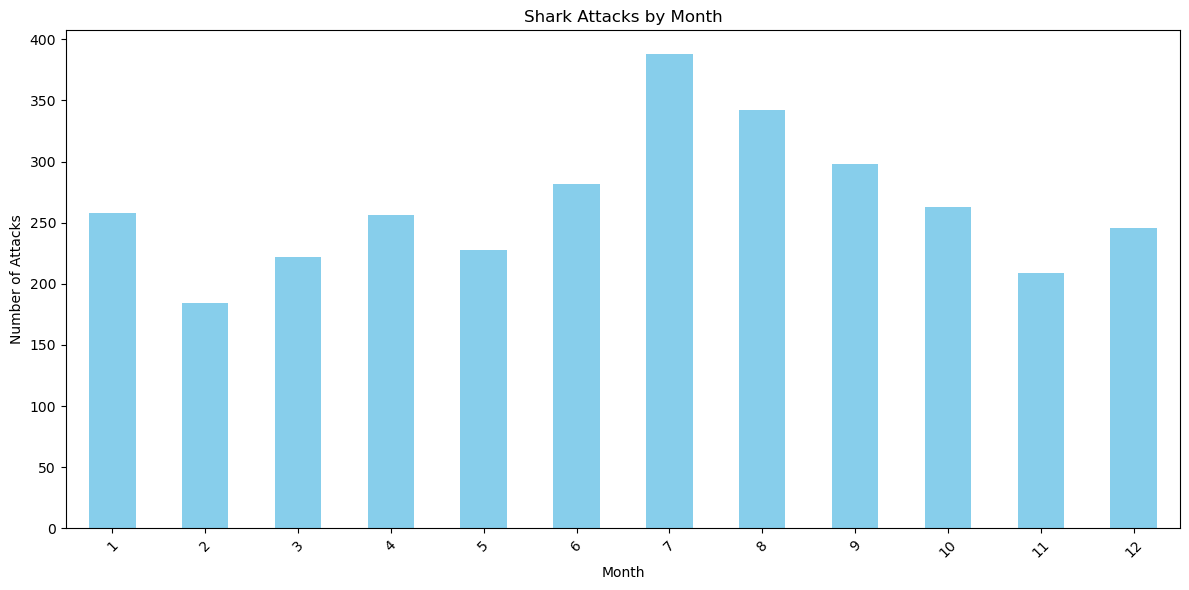

Number of Shark Attacks by Month:
Month
1     258
2     184
3     222
4     256
5     228
6     282
7     388
8     342
9     298
10    263
11    209
12    246
Name: count, dtype: int64


In [10]:
# Group by month and count the number of attacks
monthly_attacks = df['Month'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
monthly_attacks.plot(kind='bar', color='skyblue')
plt.title('Shark Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the monthly attack counts
print("\
Number of Shark Attacks by Month:")
print(monthly_attacks)

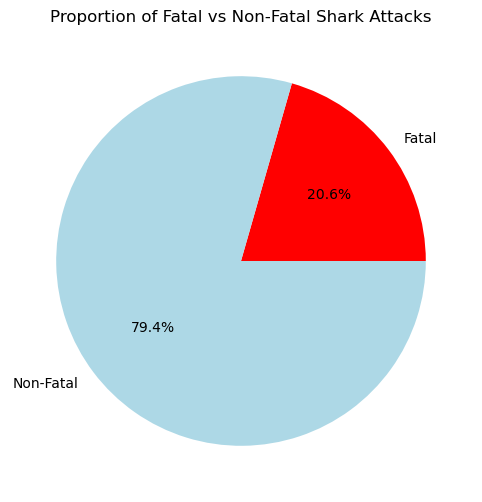

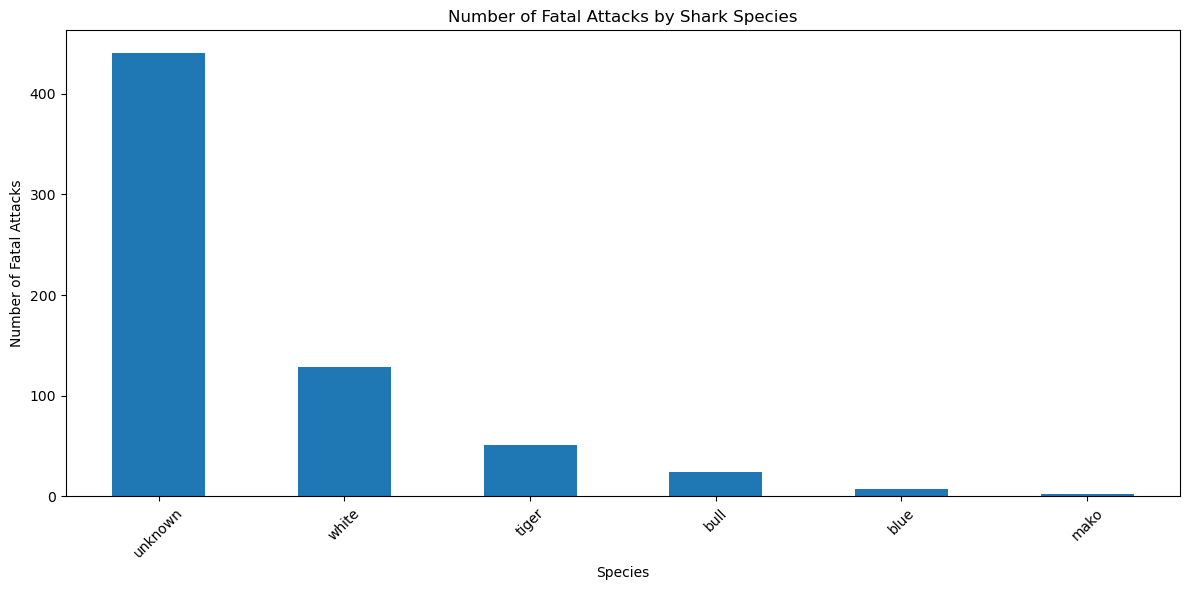

Fatal Attack Statistics:
Total number of attacks: 3176
Number of fatal attacks: 653
Number of non-fatal attacks: 2523
Fatality rate: 20.6%
Most Deadly Shark Species (Top 10):
Specie
unknown    441
white      128
tiger       51
bull        24
blue         7
mako         2
dtype: int64


In [13]:
# Calculate fatality statistics
total_attacks = len(df)
fatal_attacks = df['Fatal (Y/N)'].sum()
non_fatal_attacks = total_attacks - fatal_attacks

# Calculate species-specific fatality rates
species_fatality = df[df['Fatal (Y/N)'] == True].groupby('Specie').size().sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
plt.pie([fatal_attacks, non_fatal_attacks], 
        labels=['Fatal', 'Non-Fatal'],
        autopct='%1.1f%%',
        colors=['red', 'lightblue'])
plt.title('Proportion of Fatal vs Non-Fatal Shark Attacks')
plt.show()

# Create bar plot for most dangerous species
plt.figure(figsize=(12, 6))
species_fatality.head(10).plot(kind='bar')
plt.title('Number of Fatal Attacks by Shark Species')
plt.xlabel('Species')
plt.ylabel('Number of Fatal Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print statistics
print("\
Fatal Attack Statistics:")
print(f"Total number of attacks: {total_attacks}")
print(f"Number of fatal attacks: {fatal_attacks}")
print(f"Number of non-fatal attacks: {non_fatal_attacks}")
print(f"Fatality rate: {(fatal_attacks/total_attacks)*100:.1f}%")

print("\
Most Deadly Shark Species (Top 10):")
print(species_fatality.head(10))